In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data from the URL into a Pandas DataFrame
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

In [3]:

# Get all cars and their types that do not qualify for clean alternative fuel vehicle
not_qualify_cafv = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(not_qualify_cafv[['Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']])

Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model, Clean Alternative Fuel Vehicle (CAFV) Eligibility]
Index: []


In [4]:
# Get all TESLA cars with the model Model Year and model type made in Bothell City
tesla_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
print("TESLA cars with model Model Year and model type made in Bothell City:")
print(tesla_bothell[['Model Year', 'Model', 'City']])

TESLA cars with model Model Year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model, City]
Index: []


In [5]:
# Get all cars with an electric range of more than 100 and made after 2015
electric_range_gt_100 = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
print("Cars with an electric range of more than 100 and made after 2015:")
print(electric_range_gt_100[['Make', 'Model', 'Electric Range', 'Model Year']])

Cars with an electric range of more than 100 and made after 2015:
          Make    Model  Electric Range  Model Year
0        TESLA  MODEL X             238        2018
2        TESLA  MODEL 3             220        2019
4        TESLA  MODEL S             210        2017
12       TESLA  MODEL 3             308        2020
13       TESLA  MODEL 3             322        2020
...        ...      ...             ...         ...
130417   TESLA  MODEL Y             291        2020
130428  NISSAN     LEAF             151        2018
130432   TESLA  MODEL Y             291        2020
130436   TESLA  MODEL 3             215        2018
130441   TESLA  MODEL X             293        2020

[34066 rows x 4 columns]


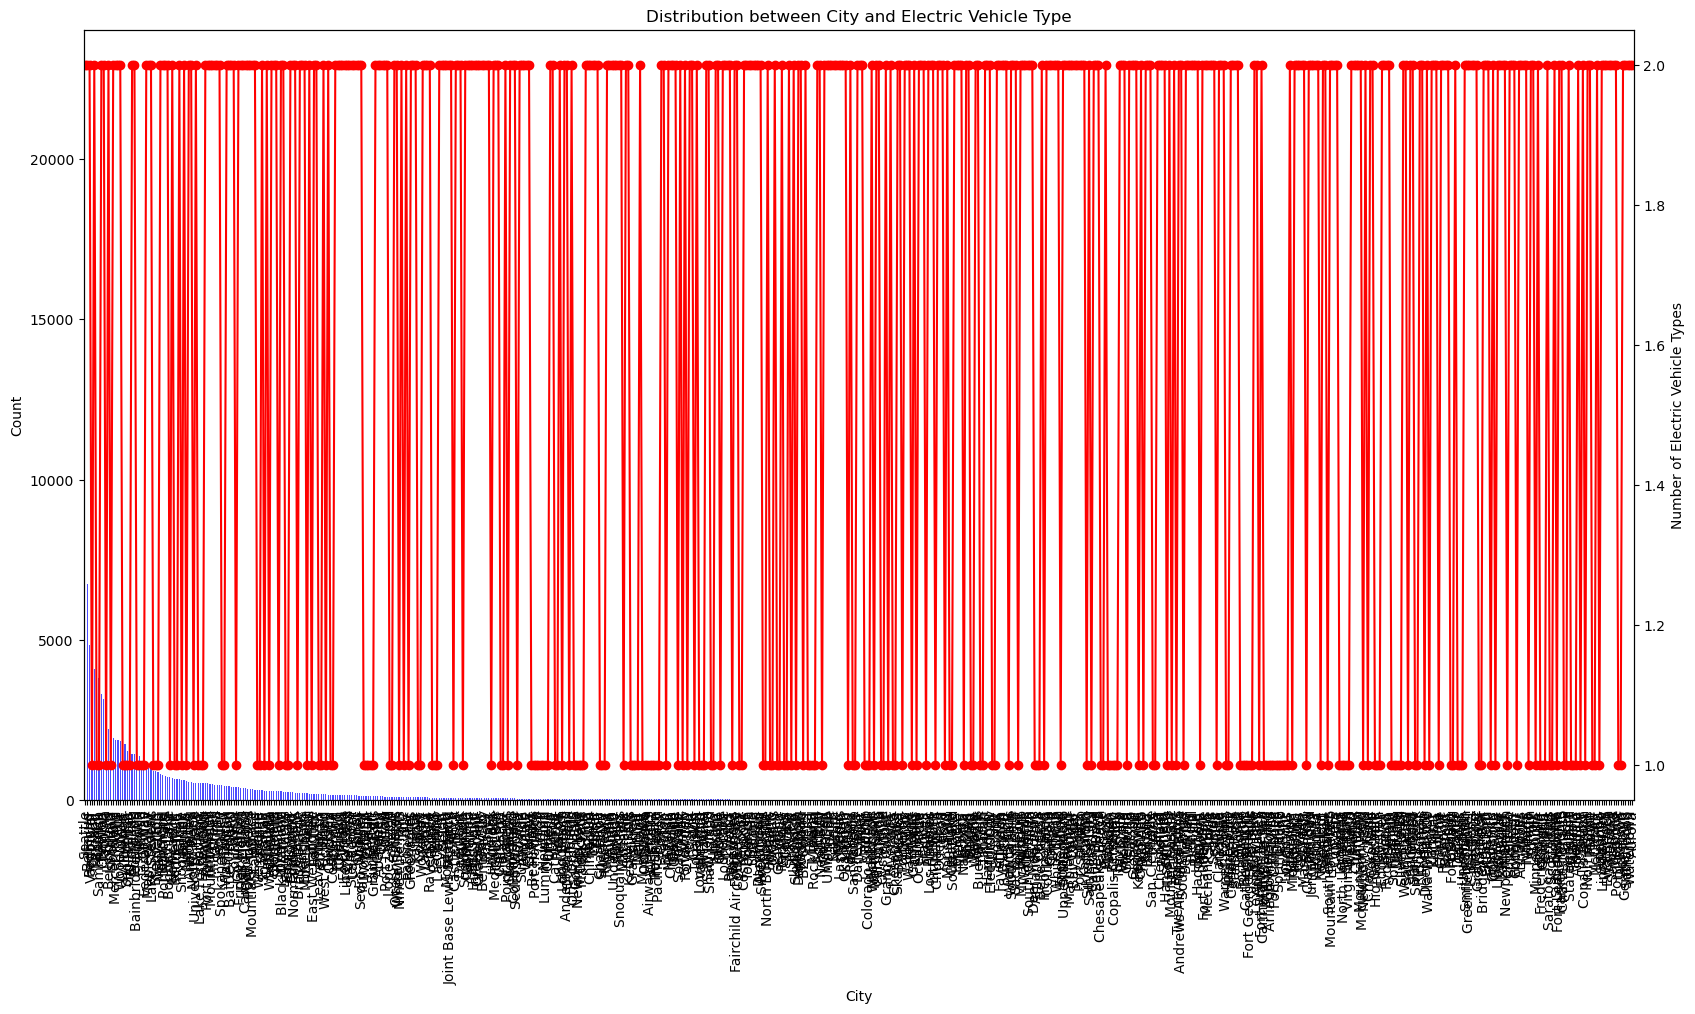

In [7]:
# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(20, 10))
data_filtered = data[data['Electric Vehicle Type'].notnull()]
ax = data_filtered['City'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
ax2 = ax.twinx()
ax2.plot(data_filtered.groupby('City')['Electric Vehicle Type'].nunique(), marker='o', color='red')
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax2.set_ylabel('Number of Electric Vehicle Types')
plt.title('Distribution between City and Electric Vehicle Type')
# plt.xticks(rotation=45)
plt.show()
